In [1]:
import copy
import matplotlib.patheffects as path_effects
#import frequently used modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import pathlib
sns.set()

In [2]:
df_clustered = pd.read_csv('./data/clustered_data.csv', parse_dates=['timestamp'])

if 'timestamp' in df_clustered.columns:
    print("Removing 'timestamp' column")
    df = copy.deepcopy(df_clustered)
    df.drop(columns=['timestamp'], inplace=True)
else:
    df = copy.deepcopy(df_clustered)
df = df.groupby('gridID', as_index=False).agg({
    'activity': 'sum',
    'x': 'first',
    'y': 'first',
    'cluster': 'first'
})
df

Removing 'timestamp' column


,gridID,activity,x,y,cluster
0,0,11032.771840,0,0,0
1,1,10926.659438,1,0,0
2,2,10809.265767,2,0,0
3,3,10510.449448,3,0,0
4,4,9602.659967,4,0,0
...,...,...,...,...,...
9995,9995,38210.095871,95,99,2
9996,9996,42005.996019,96,99,2
9997,9997,41288.384247,97,99,2
9998,9998,26170.184833,98,99,2


In [3]:
x = np.arange(100)
y = np.arange(100)

cluster_map = np.zeros((100,100))
print(cluster_map)
for y_coord in y:
    for x_coord in x:
        condition = (df['x'] == x_coord) & (df['y'] == y_coord)
        if not df[condition].empty:
            cluster_map[x_coord, y_coord] = df[condition]['cluster'].values[0]
print(cluster_map)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]]


In [4]:
clstr_0 = pd.read_csv('data/clstr_0.csv', parse_dates=['timestamp'])
clstr_1 = pd.read_csv('data/clstr_1.csv', parse_dates=['timestamp'])
clstr_2 = pd.read_csv('data/clstr_2.csv', parse_dates=['timestamp'])
clstr_3 = pd.read_csv('data/clstr_3.csv', parse_dates=['timestamp'])
clstr_4 = pd.read_csv('data/clstr_4.csv', parse_dates=['timestamp'])

clstr = {0: clstr_0.copy(), 1: clstr_1.copy(), 2: clstr_2.copy(), 3: clstr_3.copy(), 4: clstr_4.copy()}

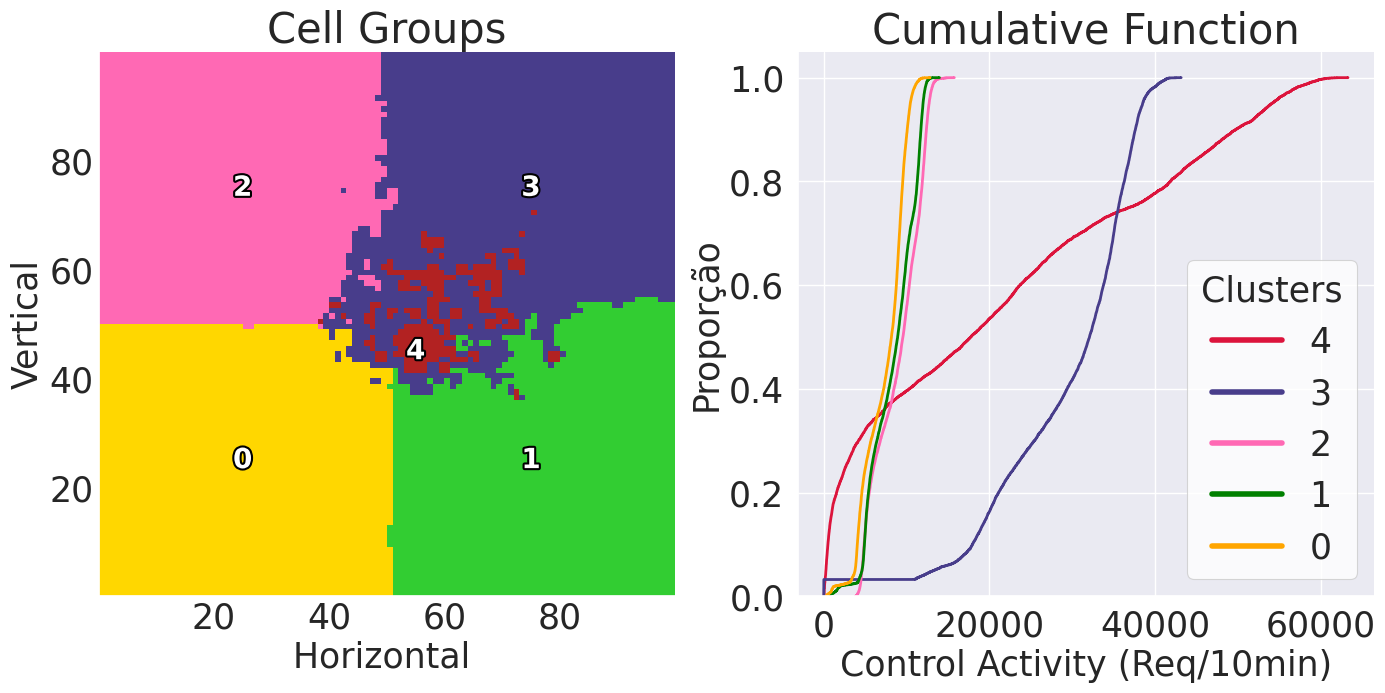

In [5]:
from matplotlib.colors import ListedColormap
# Ajustando o colormap para purples (sem o branco)
cmap = ListedColormap(['yellowgreen', 'darkorange', 'rebeccapurple', 'crimson', 'dodgerblue'])
cmap = ListedColormap(['gold', 'limegreen', 'darkslateblue', 'firebrick', 'hotpink'])

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot com pcolormesh
x = np.arange(0, cluster_map.shape[1] + 1)
y = np.arange(0, cluster_map.shape[0] + 1)
sns.set_context("paper")

# Plotando com o colormap ajustado
clstr_map = ax[0].pcolormesh(x, y, cluster_map.T, cmap=cmap, edgecolors='none', linewidth=0, antialiased=True, alpha=1.0)
# clstr_map = ax[0].imshow(cluster_map.T, origin='lower', cmap=cmap, interpolation='none')

# Ajuste dos ticks nos eixos
ax[0].tick_params(axis='both', labelsize=25)
ax[1].tick_params(axis='both', labelsize=25)
ax[0].set_xticks(np.arange(0, cluster_map.shape[0]+1, 20), labels=['', 20, 40, 60, 80, ''])
ax[0].set_yticks(np.arange(0, cluster_map.shape[1]+1, 20), labels=['', 20, 40, 60, 80, ''])

# Títulos e rótulos
ax[0].set_title('Cell Groups', fontsize=30)
ax[0].set_xlabel('Horizontal ', fontsize=25)
ax[0].set_ylabel('Vertical', fontsize=25)
ax[0].tick_params(axis='both', which='both', length=0)
# Ajuste da barra de cores (colorbar) com ticks mais finos
# fig.colorbar(clstr_map, label='Cluster', ax=ax[1], ticks=np.arange(0, 5), fraction=0.03)

ax[1].set_xlabel('Control Activity (Req/10min)', fontsize=25)
ax[1].set_ylabel('Proporção', fontsize=25)

sns.set_style('whitegrid')
sns.despine()

linewidth=2.0
factor = 1
log = False
sns.ecdfplot(clstr_3['activity']/factor, ax=ax[1], log_scale=log, color='crimson', label='4', linewidth=linewidth)
sns.ecdfplot(clstr_2['activity']/factor, ax=ax[1], log_scale=log, color='darkslateblue', label='3', linewidth=linewidth)
sns.ecdfplot(clstr_4['activity']/factor, ax=ax[1], log_scale=log, color='hotpink', label='2', linewidth=linewidth)
sns.ecdfplot(clstr_1['activity']/factor, ax=ax[1], log_scale=log, color='green', label='1', linewidth=linewidth)
sns.ecdfplot(clstr_0['activity']/factor, ax=ax[1], log_scale=log, color='orange', label='0', linewidth=linewidth)
ax[1].set_title("Cumulative Function", fontsize=30)
leg = ax[1].legend(loc='best', fontsize=25, title='Clusters', title_fontsize=25, markerscale=3.0)
for line in leg.get_lines():
    line.set_linewidth(4.0)
ax[1].set_ylim(0.0, 1.05)
fig.tight_layout(pad=1.0)


cluster_labels = {
    0: (25, 25),
    1: (75, 25),
    2: (25, 75),
    3: (75, 75),
    4: (55, 45),
}

for cluster_id, (x, y) in cluster_labels.items():
    ax[0].text(
        x, y, f'{cluster_id}',
        color='white',
        fontsize=20,
        fontweight='bold',
        ha='center',
        va='center',
        path_effects=[
            path_effects.Stroke(linewidth=3, foreground='black'),  # borda preta
            path_effects.Normal()
        ]
    )


save = True
if save:
    plt.savefig('images/cluster_map_ecdf.pdf', bbox_inches='tight')
plt.show()